In [1]:
!pip install -U -q transformers
!pip install -U -q accelerate
!pip install -U -q datasets
!pip install -U -q bertviz
!pip install -U -q umap-learn
!pip install -U -q evaluate

Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C


In [9]:
!pip install matplotlib


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8d/2f/804f02ff30a7fae21f98198828d0857439ec4c91a96e20cf2d6c49372966/contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c8/e1/059700c154bd7170d1c37061239836d2e51ff608f47075450f06dd3c292a/fonttools-4.53.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 660.6 kB/s e

In [10]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import AutoModel

In [4]:
url_dataset = 'https://raw.githubusercontent.com/tahahamdii/bert-finetunig/main/sentiment.csv'
df = pd.read_csv(url_dataset)
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
df.isnull().sum()

text          0
label         0
label_name    0
dtype: int64

In [7]:
df['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

Text(0, 0.5, 'Emotions')

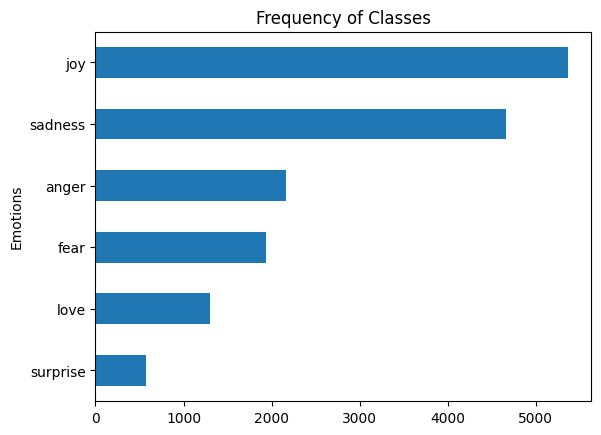

In [11]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.ylabel('Emotions')


In [12]:
df['words per tweet'] = df['text'].str.split().apply(len)
df

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

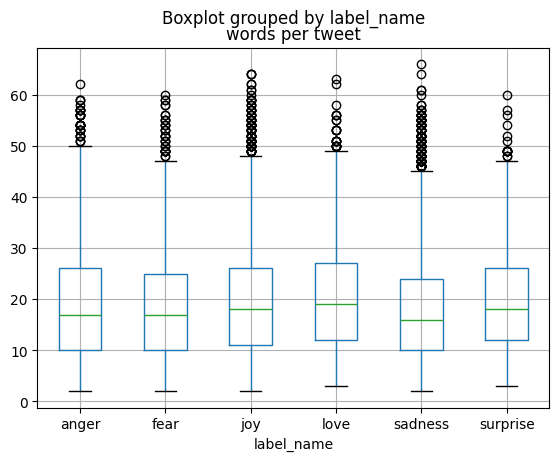

In [13]:
df.boxplot("words per tweet", by='label_name')

# Data Preparation

### Tokenizing Test

In [14]:
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\projects\bert\.venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Expert Gaming\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

C:\projects\bert\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
text = "I love machne learning! Tokenization is awesome!"

encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 24532, 2638, 4083, 999, 19204, 3989, 2003, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [16]:
tokenizer.vocab

{'menacing': 24060,
 '₹': 1576,
 'null': 19701,
 'rave': 23289,
 'accuracy': 10640,
 'romano': 22070,
 '##rter': 19418,
 'preparation': 7547,
 'yielded': 17544,
 'obligation': 14987,
 'orders': 4449,
 'consular': 27326,
 'seeing': 3773,
 'missionaries': 11743,
 '谷': 1951,
 'fragile': 13072,
 'motions': 15323,
 'riley': 7546,
 'ruled': 5451,
 'ally': 9698,
 'appetite': 18923,
 'boogie': 21495,
 'zambia': 15633,
 '[unused446]': 451,
 '119': 13285,
 'inside': 2503,
 'pep': 27233,
 'distribution': 4353,
 'pulses': 23894,
 '##tracted': 24301,
 'decisive': 13079,
 'lars': 16357,
 '##mark': 10665,
 'ᶜ': 1511,
 'column': 5930,
 'clothed': 24963,
 '##mer': 5017,
 'fruits': 10962,
 '[unused92]': 93,
 'magnificent': 12047,
 'devastation': 25594,
 'wider': 7289,
 '##nivorous': 29193,
 'mecca': 21340,
 'm3': 29061,
 '[unused471]': 476,
 'shots': 7171,
 'papers': 4981,
 'snarled': 15022,
 '##edes': 18352,
 'trophies': 22236,
 'advises': 25453,
 '227': 21489,
 '##tale': 22059,
 'tamil': 6008,
 'kyush

In [17]:
len(tokenizer.vocab)

30522